In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import project_env as pe
import error_analysis as ea
import sklearn as sklearn
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
val = pd.read_csv('val.csv')

# Target Variable

In [4]:
#target variable of rearrest in 2 years
X_train, y_train = pe.create_target(train, years = 2)
X_val, y_val = pe.create_target(val, years = 2)

In [5]:
unique, counts = np.unique(y_train, return_counts = True)
percent = counts[1]/counts.sum()
print('Training: %s percent were rearrested.' %(percent*100))

unique, counts = np.unique(y_val, return_counts = True)
percent = counts[1]/counts.sum()
print('Test: %s percent were rearrested.' %(percent*100))


Training: 40.3177004539 percent were rearrested.
Test: 40.8131106209 percent were rearrested.


In [6]:
#remove non-feature columns
X_train=X_train.drop(['BOFI_NBR','SCREENING_DISP_CODE','UNIQUE_ID','NEXT_ARREST_TIME'], axis=1)
X_val=X_val.drop(['BOFI_NBR','SCREENING_DISP_CODE','UNIQUE_ID','NEXT_ARREST_TIME'], axis=1)

#Using year and month as predictive variables
X_train=X_train.drop(['ARREST_DATE', 'ARREST_DATE_y'], axis=1)
X_val=X_val.drop(['ARREST_DATE','ARREST_DATE_y'], axis=1)

# Gradient Boosted Trees

In [7]:
gbt = GradientBoostingClassifier()
gbt = gbt.fit(X_train,y_train)

gbt_pred_train = gbt.predict(X_train)
gbt_pred_val = gbt.predict(X_val)

In [8]:
# gbt accuracy
gbt_accu_train = sklearn.metrics.accuracy_score(y_train,gbt_pred_train)
gbt_accu_test = sklearn.metrics.accuracy_score(y_val,gbt_pred_val)

print("Accuracy on Training Dataset: {}".format(gbt_accu_train))
print("Accuracy on Val Dataset: {}".format(gbt_accu_test))

Accuracy on Training Dataset: 0.6927319717599597
Accuracy on Val Dataset: 0.6870469587141507


In [9]:
gbt_precision = sklearn.metrics.precision_score(y_val,gbt_pred_val)
gbt_recall = sklearn.metrics.recall_score(y_val,gbt_pred_val)
gbt_f_score = sklearn.metrics.f1_score(y_val,gbt_pred_val)

print("Precision: {}".format(gbt_precision))
print("Recall: {}".format(gbt_recall))
print("F-Score: {}".format(gbt_f_score))

Precision: 0.6403867608776497
Recall: 0.5318918918918919
F-Score: 0.5811187041255379


In [10]:
#confusion matrix for val set
gbt_cm = sklearn.metrics.confusion_matrix(y_val,gbt_pred_val)
gbt_cm    #add cm.to_latex?

array([[7456, 1934],
       [3031, 3444]])

In [11]:
np.save('pred_train_2yr_gbt.npy', gbt_pred_train)

### Error Analysis GBT

In [12]:
numeric = ['NEXT_ARREST_TIME','CRIMINAL_FLAG','FINAL_DETENTION_FLAG','HABITUAL_OFFENDER_FLAG',\
           'INITIAL_DETENTION_FLAG','JUVENILE_FLAG','TOT_NUM_DEF','MULTIPLE_DEF_FLAG','SCREENING_DAYS',\
           'ARREST_DATE_y','SCREENING_DISP_DATE_y',\
           'SCREENING_DISP_DATE_m', 'AGE', 'ARREST_TO_SCREEN']

numeric_exc_binary = ['NEXT_ARREST_TIME','TOT_NUM_DEF','MULTIPLE_DEF_FLAG','SCREENING_DAYS',\
           'ARREST_DATE_y','SCREENING_DISP_DATE_y',\
           'SCREENING_DISP_DATE_m', 'AGE', 'ARREST_TO_SCREEN']

categorical =['ARREST_CREDIT_CODE', 'CHARGE_CLASS', 'CHARGE_TYPE',\
       'PARTY', 'RACE', 'SADA_RACE','SEX','SADA_SEX']

In [23]:
train_error = ea.Error_Analysis('2_yr_gbt', 'data_train.csv', 'pred_train_2yr_gbt.npy')

variable:  NEXT_ARREST_TIME
variable:  TOT_NUM_DEF
variable:  MULTIPLE_DEF_FLAG
variable:  SCREENING_DAYS
variable:  ARREST_DATE_y
variable:  SCREENING_DISP_DATE_y
variable:  SCREENING_DISP_DATE_m
variable:  AGE
variable:  ARREST_TO_SCREEN


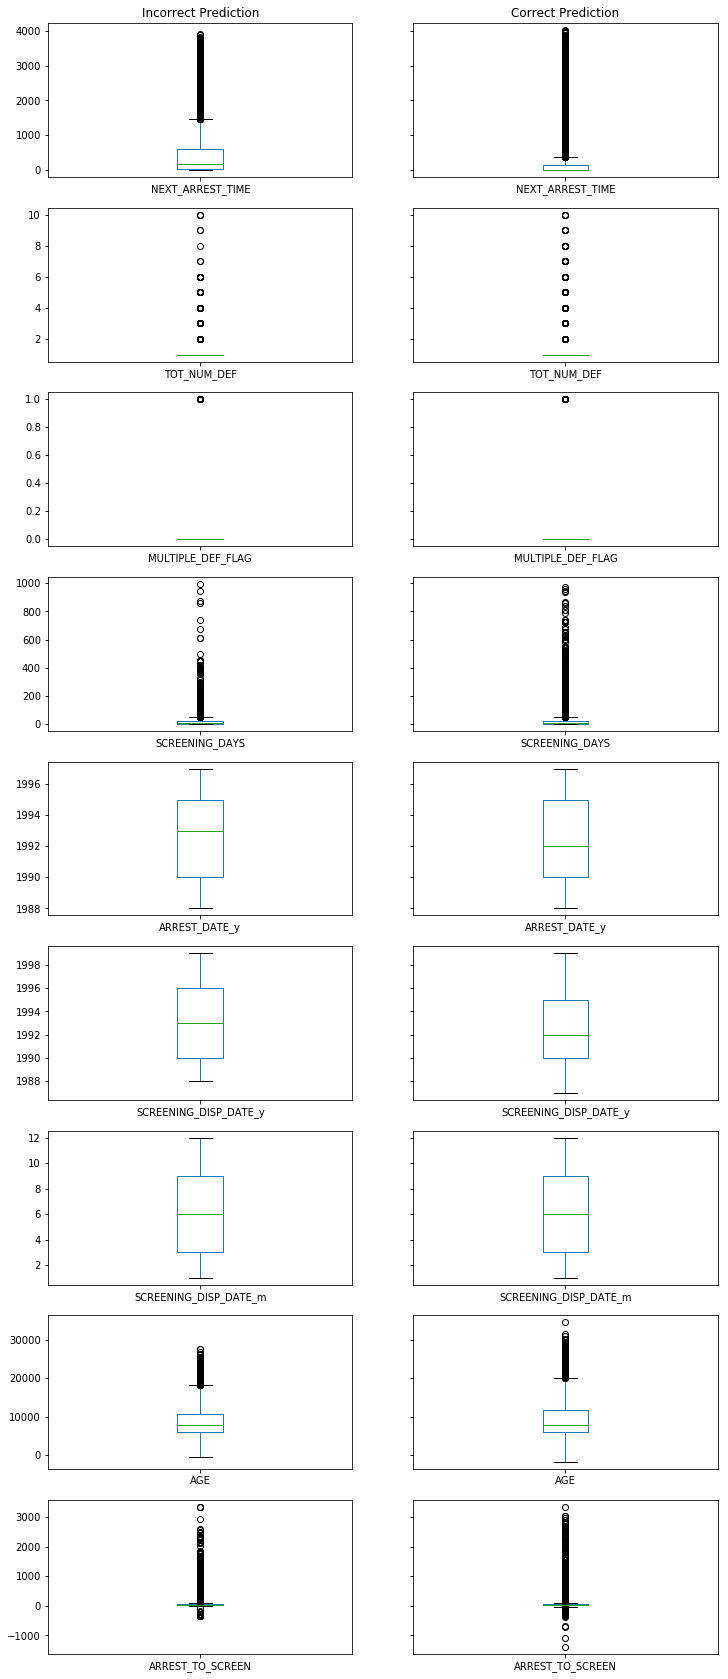

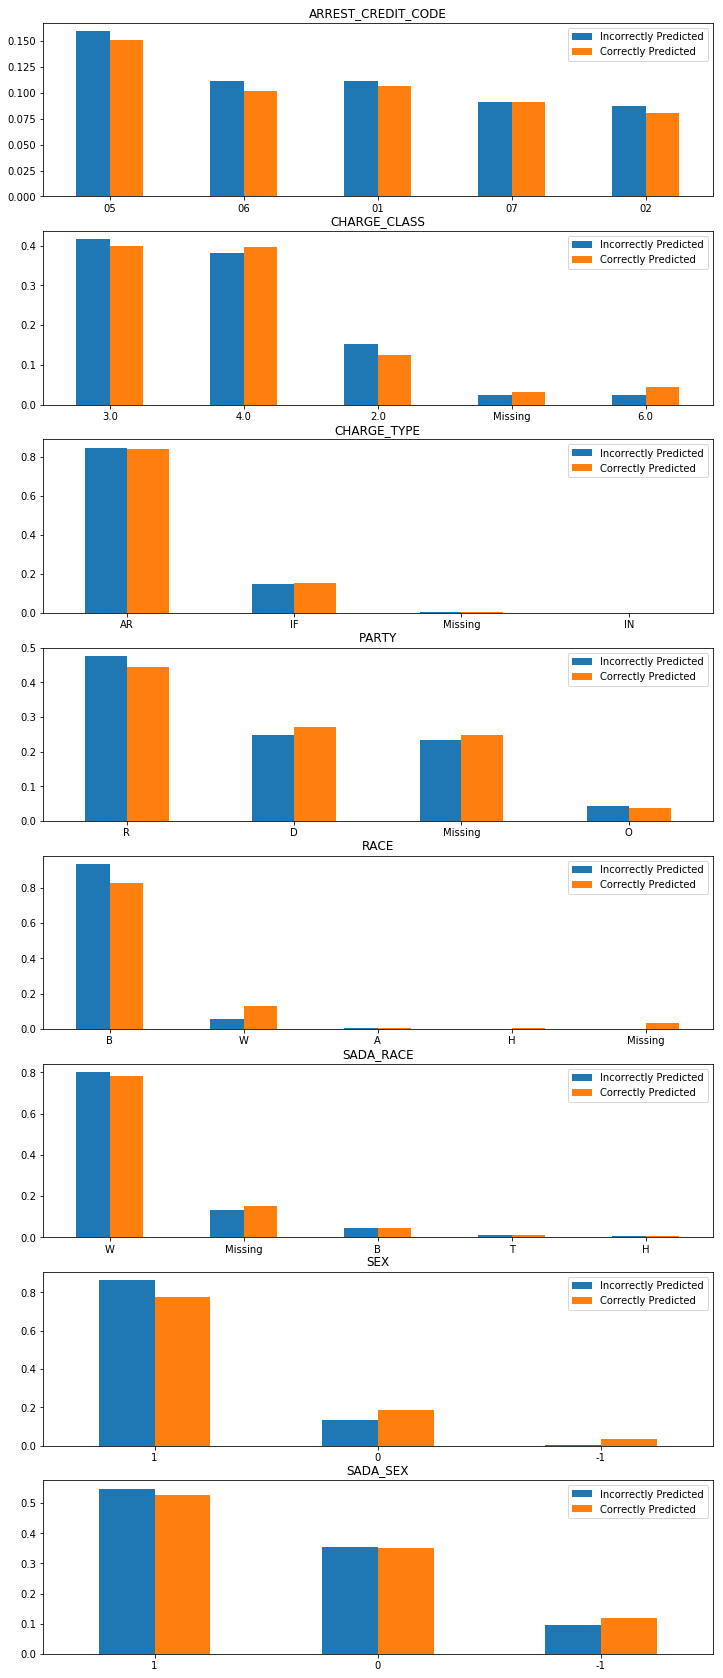

In [24]:
train_error.all_error_analysis(2, numeric_exc_binary, numeric, categorical)

# Random Forest

In [15]:
rf_clf =  RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)

rf_pred_train = rf_clf.predict(X_train)
rf_pred_val = rf_clf.predict(X_val)

In [16]:
#a rf ccuracy
rf_accu_train = sklearn.metrics.accuracy_score(y_train,rf_pred_train)
rf_accu_test = sklearn.metrics.accuracy_score(y_val,rf_pred_val)

print("Accuracy on Training Dataset: {}".format(rf_accu_train))
print("Accuracy on Val Dataset: {}".format(rf_accu_test))

Accuracy on Training Dataset: 0.9793242561775088
Accuracy on Val Dataset: 0.6545225338796092


In [17]:
rf_precision = sklearn.metrics.precision_score(y_val,rf_pred_val)
rf_recall = sklearn.metrics.recall_score(y_val,rf_pred_val)
rf_f_score = sklearn.metrics.f1_score(y_val,rf_pred_val)

print("Precision: {}".format(rf_precision))
print("Recall: {}".format(rf_recall))
print("F-Score: {}".format(rf_f_score))

Precision: 0.6002824858757062
Recall: 0.4594594594594595
F-Score: 0.5205143906919779


In [18]:
#confusion matrix for val set
rf_cm = sklearn.metrics.confusion_matrix(y_val,rf_pred_val)
rf_cm    #add cm.to_latex?

array([[7409, 1981],
       [3500, 2975]])

### Error Analysis Random Forest

In [19]:
np.save('pred_train_2yr_rf.npy', rf_pred_train)

In [20]:
train_error_rf = ea.Error_Analysis('2_yr_rf', 'data_train.csv', 'pred_train_2yr_rf.npy')

variable:  NEXT_ARREST_TIME
variable:  TOT_NUM_DEF
variable:  MULTIPLE_DEF_FLAG
variable:  SCREENING_DAYS
variable:  ARREST_DATE_y
variable:  SCREENING_DISP_DATE_y
variable:  SCREENING_DISP_DATE_m
variable:  AGE
variable:  ARREST_TO_SCREEN


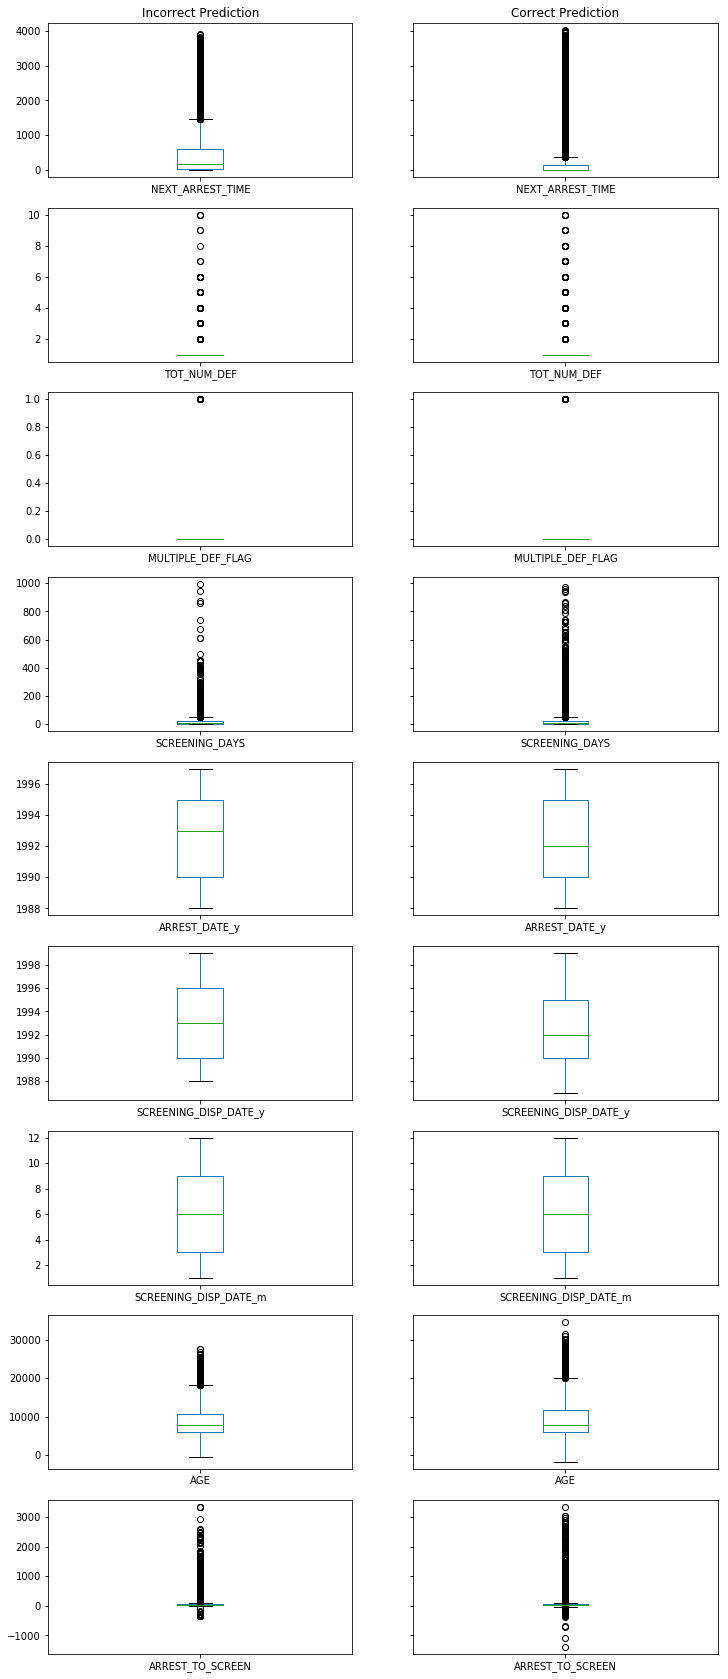

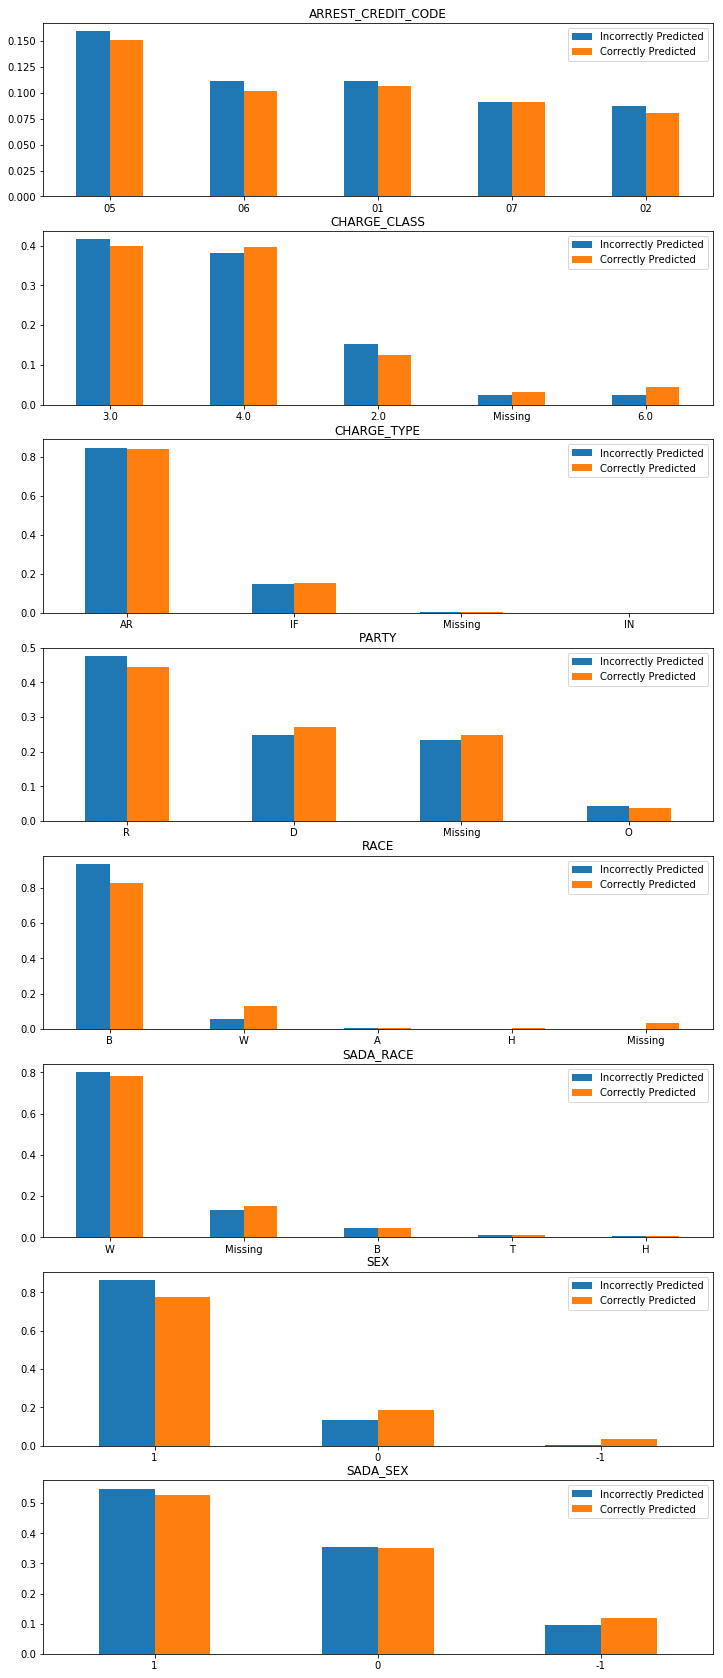

In [21]:
train_error.all_error_analysis(2, numeric_exc_binary, numeric, categorical)